<a href="https://colab.research.google.com/github/rvalienter90/UCF/blob/master/CAP-5610_MACHINE%20LEARNING/HW1/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***RODOLFO VALIENTE ROMERO***

#**HW 1**

** *Code is based on course notes and was used code from the Colab examples**

This homework will get you up to speed with Python programming, numpy, matplotlib, Keras, gradients, partial derivatives, git, GitHub, Google's colaboratory etc. Have fun!

For this homework, you will create neural networks with an input layer and an output layer without any hidden layers. The connections are dense: each input neuron is connected to each output neuron.

Instructions for problems 1 and 2:
- Load the training and test data using Keras, no validation set needed.
- Train 10 classifiers that perform binary classification: *Is the input image the digit i or is it a digit different from i?* Each of the ten classifiers has an input layer consisting of 28 x 28 input neurons and an output layer consisting of a single output neuron.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.
- Use ```argmax``` to determine the classifier with the strongest output and declare the corresponding digit as output.

## Load and Explore data

### Exploring the format of the MNIST digits data set

In [0]:
print("train_images_original ",train_images_original.shape)
print("len train_images_original", len(train_images_original))
print(train_images_original.ndim)
print("train_labels_original ",train_labels_original)
print("train_labels_original.shape ", train_labels_original.shape)

train_images_original  (60000, 28, 28)
len train_images_original 60000
3
train_labels_original  [5 0 4 ... 5 6 8]
train_labels_original.shape  (60000,)


### Displaying MNIST digits

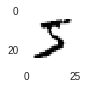

In [0]:
import matplotlib.pyplot as plt
digit_0 = train_images_original[0]
plt.figure(figsize=(1,1))
plt.imshow(digit_0)
plt.grid(None)
plt.show()

In [0]:
print("digit_0.shape ",digit_0.shape)
print("label0 ",train_labels_original[0])

digit_0.shape  (28, 28)
label0  5


### Preparing the image data

In [4]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print("train_images.shape ", train_images.shape)
print("train_images_original.shape ", train_images_original.shape)

print(sigmoid(0))
arr=np.zeros((3,1))
print(sigmoid(arr))
arr.shape
train_images_b, train_labels_original, test_images_b, test_labels_original=load_data()

train_images.shape  (60000, 784)
train_images_original.shape  (60000, 28, 28)


## Loading the MNIST digits data set, and implement functions for P1,P2,P3

```
# This is formatted as code
```



In [0]:
# Load the training and test data using Keras, no validation set needed.
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()



Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
#functions

def my_own_categoricalv1 (train_labels_original):
  train_labels_i=np.zeros((train_labels_original.shape[0],10))
  for i in range(0,9):

    train_labels_i_temp=train_labels_original==i
    train_labels_i_temp=train_labels_i_temp.astype('float32')
    train_labels_i[:,i]=train_labels_i_temp
  return train_labels_i

def my_own_categorical (train_labels_original):
  Y = np.zeros((train_labels_original.shape[0], 10))
  Y[np.arange(train_labels_original.shape[0]),train_labels_original] = 1
  return Y

def sigmoid(z):
  return 1/(1+np.exp(-z))

def softmax_morestable(X):
    exps = np.exp(X - np.max(X))
    return exps / np.sum(exps)
def softmax(z):
  return np.exp(z)/np.sum(np.exp(z), axis = 1, keepdims= True)

def sigmoid_grad (x):    
  da = sigmoid(x)*(1-sigmoid(x))
  return da

def forward(X,W):
  Z = np.dot(X, W)
  return Z

def forward_sigmoid(X,W):
  Z = np.dot(X, W)
  Y = sigmoid(Z)
  return Y

def forward_softmax(X,W):
  Z = np.dot(X, W)
  Y = softmax(Z)
  return Y

def sigmoid_predict(X,W):
  Z=forward(X,W)
  return 1/(1+np.exp(-Z))

def softmax_output(Z):
  return softmax(Z)

def sigmoid_output(Z):
  return sigmoid(Z)

def ce_loss(Y,A):
  loss = - np.sum(Y*np.log(A)+(1-Y)*np.log(1 - A))/Y.shape[0]
  return loss

def se_loss (Y,A):
  loss = 1/2*np.sum((Y-A)*(Y-A))/Y.shape[0]
  return loss

def cc_loss (Y,A): 
  loss = - np.sum(Y*np.log(A))/Y.shape[0]
  return loss

def load_data():
  (train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()
  train_images = train_images_original.reshape(train_images_original.shape[0], -1)/255
  #train_images = train_images.astype('float32') / 255

  test_images = test_images_original.reshape(test_images_original.shape[0], -1)/255
  #test_images = test_images.astype('float32') / 255
  
  train_images_b =  np.c_[np.ones((train_images.shape[0], 1)), train_images]
  test_images_b = np.c_[np.ones((test_images.shape[0], 1)), test_images]
  
  
  
  return train_images_b, train_labels_original, test_images_b, test_labels_original

def train_model_se(train_images_b, Y_train,lr=0.001,batch_size=40,epochs=10):
  print("train model se")
  lr=lr
  batch_size=batch_size
  epochs=epochs
  W= np.zeros((train_images_b.shape[1], 1))
  m = train_images_b.shape[0]
  
  for epoch in range (0,epochs): 
    shuffled_indices = np.random.permutation(m)
    X_shuffled = train_images_b[shuffled_indices]
    y_shuffled = Y_train[shuffled_indices]
    
    for i in range(0, m, batch_size):    
      X = X_shuffled[i : i + batch_size]
      Y = y_shuffled[i : i + batch_size]  

      y_est = forward_sigmoid(X, W)   
      
      dZ = (1/batch_size)*y_est*(1-y_est)*(y_est - Y) 
      dW = np.dot(X.T, dZ)
      W = W - lr*dW 
    
    #y_est=forward_sigmoid(train_images_b, W) 
    #loss = se_loss(Y_train, y_est)
    #print("Epoch ",epoch," Loss =", loss)
  y_est=forward_sigmoid(train_images_b, W) 
  loss = se_loss(Y_train, y_est)
  print("Epoch ",epoch," Loss =", loss)
  return W

def train_model_ce(train_images_b, Y_train,lr=0.001,batch_size=40,epochs=10):
  print("train model ce")
  lr=lr
  batch_size=batch_size
  epochs=epochs
  W= np.zeros((train_images_b.shape[1], 1))
  m = train_images_b.shape[0]
  
  for epoch in range (0,epochs): 
    shuffled_indices = np.random.permutation(m)
    X_shuffled = train_images_b[shuffled_indices]
    y_shuffled = Y_train[shuffled_indices]
    
    for i in range(0, m, batch_size):    
      X = X_shuffled[i : i + batch_size]
      Y = y_shuffled[i : i + batch_size]  

      y_est = forward_sigmoid(X, W)   
      
      dZ = (1/batch_size)*(y_est - Y) 
      dW = np.dot(X.T, dZ)  
      W = W - lr*dW 
    
    #y_est=forward_sigmoid(train_images_b, W) 
    #loss = ce_loss(Y_train, y_est)
    #print("Epoch ",epoch," Loss =", loss)
  y_est=forward_sigmoid(train_images_b, W) 
  loss = ce_loss(Y_train, y_est)
  print("Epoch ",epoch," Loss =", loss)
  return W

def train_model_cc(train_images_b, Y_train,lr=0.001,batch_size=40,epochs=10):
  print("train model cc")
  lr=lr
  batch_size=batch_size
  epochs=epochs
  W= np.zeros((train_images_b.shape[1], 10))
  m = train_images_b.shape[0]
  
  for epoch in range (0,epochs): 
    shuffled_indices = np.random.permutation(m)
    X_shuffled = train_images_b[shuffled_indices]
    y_shuffled = Y_train[shuffled_indices]
    
    for i in range(0, m, batch_size):    
      X = X_shuffled[i : i + batch_size]
      Y = y_shuffled[i : i + batch_size]  

      y_est = forward_softmax(X, W)   
      
      dZ = (1/batch_size)*(y_est - Y) 
      dW = np.dot(X.T, dZ)   

      W = W - lr*dW 
    
    #y_est=forward_softmax(train_images_b, W) 
    #loss = ce_loss(Y_train, y_est)
    #print("Epoch ",epoch," Loss =", loss)
  y_est=forward_softmax(train_images_b, W) 
  loss = cc_loss(Y_train, y_est)
  print("Epoch ",epoch," Loss =", loss)
  return W

## Problem 1 Explore

Use logistic regression with mean squared error loss.

In [0]:
# add bias to each instance
m,n=train_images.shape
train_images_b = np.c_[np.ones((m, 1)), train_images]

print("train_images_b.shape ", train_images_b.shape)
print("train_labels_original.shape ",train_labels_original.shape)

# fix initial random weight for 
# - mini-batch gradient descent
np.random.seed(42)
initial_weight = np.random.randn(n+1, 1) 
print("initial_weight.shape ",initial_weight.shape)

train_images_b.shape  (60000, 785)
train_labels_original.shape  (60000,)
initial_weight.shape  (785, 1)


### 0 Classifier

train_labels_0.shape  (60000,)


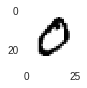

In [0]:
train_labels_0=train_labels_original==0
train_labels_0=train_labels_0.astype('int')
print("train_labels_0.shape ",train_labels_0.shape)


train_labels_0=train_labels_0.reshape(m,1)
digit_0 = train_images_original[1]
plt.figure(figsize=(1,1))
plt.imshow(digit_0)
plt.grid(None)
plt.show()

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.001
weight = initial_weight
batch_size = 64

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    y_shuffled = train_labels_0[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = train_images_b_shuffled[i:i+batch_size,:]
        yi = y_shuffled[i:i+batch_size,:]
        z=xi.dot(weight)
        a=sigmoid(z)
        da=(a -yi)
        dz=da*a*(1-a)
        gradient = 1/batch_size * xi.T.dot(dz)
        weight = weight - lr * gradient


y_predict = sigmoid(train_images_b[1].dot(weight))                  
y_predict 

array([1.1111798e-12])

### Train 10 classifiers that perform binary classification¶

In [39]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

print(train_labels.shape)
print(train_labels.dtype)

(60000, 10)
float32


In [0]:
def my_own_categorical (train_labels_original):
  train_labels_i=np.zeros((train_labels_original.shape[0],10))
  for i in range(0,9):

    train_labels_i_temp=train_labels_original==i
    train_labels_i_temp=train_labels_i_temp.astype('float32')
    train_labels_i[:,i]=train_labels_i_temp
  return train_labels_i

In [43]:
train_labels_i=my_own_categorical(train_labels_original)
#test
train_labels==train_labels_i

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [0]:
train_labels_i=np.zeros((m,10))
for i in range(0,9):
  
  train_labels_i_temp=train_labels_original==i
  train_labels_i_temp=train_labels_i_temp.astype('float32')
  train_labels_i[:,i]=train_labels_i_temp

print("train_labels_i.shape ",train_labels_i.shape)
train_labels_i

weight_i=np.zeros((features,10))
print("weight_i.shape ",weight_i.shape)
print("initial_weight.shape ",initial_weight.shape)

train_labels_i.shape  (60000, 10)
weight_i.shape  (785, 10)
initial_weight.shape  (785, 1)


In [0]:
lr=0.001
features=initial_weight.shape[0]
weight_i=np.zeros((features,10))

for dig in range(0,10):
  weight = initial_weight
  for epoch in range(epochs):
      shuffled_indices = np.random.permutation(m)
      train_images_b_shuffled = train_images_b[shuffled_indices]
      y_shuffled = train_labels_i[:,dig][shuffled_indices]
      y_shuffled=y_shuffled.reshape(m,1)
      for i in range(0, m, batch_size):
          xi = train_images_b_shuffled[i:i+batch_size,:]
          yi = y_shuffled[i:i+batch_size,:]
          z=xi.dot(weight)
          a=sigmoid(z)
          da=(a-yi)
          #dz=da*a*(1-a)
          dz=da
          gradient = 1/batch_size * xi.T.dot(dz)
          weight = weight - lr * gradient
  
  weight_i[:,dig]=weight.reshape(features)

In [71]:
train_images_b, train_labels_original, test_images_b, test_labels_original=load_data()
Y=my_own_categorical(train_labels_original)
initial_weight = np.random.randn(train_images_b.shape[1], 1) 

#for i in range(10):
  
  
initial_weight.shape
W = mymodel_se(train_images_b, Y[:,0].reshape((train_labels_original.shape[0],1)),initial_weight,0.001,128,10)
W.shape


(785, 1)

###Evaluate predictions


In [84]:
y_predict = sigmoid(train_images_b[1].dot(weight_i))                  
print(y_predict)
print(y_predict.shape)
print("Prediction ", np.argmax(y_predict))
print("Real ", train_labels_original[1])

[9.99999714e-01 2.09629540e-05 6.99820995e-04 1.06912247e-03
 8.51978048e-06 8.73723948e-02 1.69796855e-03 9.31600557e-03
 5.71442494e-04 3.56822107e-05]
(10,)
Prediction  0
Real  0


In [85]:
# Train accuracy
m=train_labels_original.shape[0]

predicted_labels_raw=sigmoid(train_images_b.dot(weight_i))  
print(predicted_labels_raw.shape)
predicted_labels=np.argmax(predicted_labels_raw,axis=1)
print(predicted_labels.shape)
print(train_labels_original.shape)
predicted_labels = predicted_labels.astype('uint8')
train_labels_original=train_labels_original.astype('uint8')

wrong_indices = [i for i in range(m) if predicted_labels[i] != train_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_train=1.0 - len(wrong_indices) / m
print("Train acc= ", acc_train)

(60000, 10)
(60000,)
(60000,)
Train acc=  0.7782833333333333


In [76]:
# Test accuracy
mt=test_labels_original.shape[0]

#m,n=test_images.shape

test_images_b = np.c_[np.ones((mt, 1)), test_images]

predicted_labels_test_raw=sigmoid(test_images_b.dot(weight_i))  
print(predicted_labels_test_raw.shape)
predicted_labels_test=np.argmax(predicted_labels_test_raw,axis=1)
print(predicted_labels_test.shape)
print(test_labels_original.shape)
predicted_labels_test = predicted_labels_test.astype('uint8')
test_labels_original=test_labels_original.astype('uint8')

wrong_indices_test = [i for i in range(mt) if predicted_labels_test[i] != test_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_test=1.0 - len(wrong_indices_test) / mt
print("Test acc= ",acc_test)

(10000, 10)
(10000,)
(10000,)
Test acc=  0.4374


## Problem 1 Final solution --Use logistic regression with mean squared error loss.

In [90]:
#Train
train_images_b, train_labels_original, test_images_b, test_labels_original=load_data()
Y=my_own_categorical(train_labels_original)
Wi = {}
for i in range(10):
  print("Digit ", i)
  Wi[i] = train_model_se(train_images_b, Y[:,i].reshape(-1,1), 0.001, 40, 20)


Digit  0
Epoch  19  Loss = 0.012306518368847885
Digit  1
Epoch  19  Loss = 0.01147720710414339
Digit  2
Epoch  19  Loss = 0.0220126141355691
Digit  3
Epoch  19  Loss = 0.023370847166057595
Digit  4
Epoch  19  Loss = 0.02070210497284014
Digit  5
Epoch  19  Loss = 0.02910970829191425
Digit  6
Epoch  19  Loss = 0.015725505808572897
Digit  7
Epoch  19  Loss = 0.015702935915504982
Digit  8
Epoch  19  Loss = 0.037105040674642466
Digit  9
Epoch  19  Loss = 0.0005978010638481055


In [93]:
#Evaluation
for i in range (10):
  Y_estimated = (forward_sigmoid(test_images_b, Wi[i])>0.5)
  accuracy = np.sum((Y_estimated == (test_labels_original == i).reshape(-1,1)))/test_labels_original.shape[0]
  print ("Digit ", i, "Accuracy", accuracy)

Digit  0 Accuracy 0.9793
Digit  1 Accuracy 0.9842
Digit  2 Accuracy 0.9525
Digit  3 Accuracy 0.953
Digit  4 Accuracy 0.9573
Digit  5 Accuracy 0.9227
Digit  6 Accuracy 0.9732
Digit  7 Accuracy 0.9707
Digit  8 Accuracy 0.9082
Digit  9 Accuracy 0.8991


## Problem 2 Explore

Use logistic regression with binary cross entropy loss.

In [0]:
# add bias to each instance
m,n=train_images.shape
train_images_b = np.c_[np.ones((m, 1)), train_images]


# fix initial random weight for 
# - mini-batch gradient descent
np.random.seed(42)
initial_weight = np.random.randn(n+1, 1) 

### 0 Classifier

In [0]:
train_labels_0=train_labels_original==0
train_labels_0=train_labels_0.astype('int')
train_labels_0=train_labels_0.reshape(m,1)
train_labels_0

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
weight = initial_weight
batch_size = 64

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    y_shuffled = train_labels_0[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = train_images_b_shuffled[i:i+batch_size,:]
        yi = y_shuffled[i:i+batch_size,:]
        z=xi.dot(weight)
        a=sigmoid(z)
        gradient = 1/batch_size * xi.T.dot(a -yi)
        weight = weight - lr * gradient


y_predict = sigmoid(train_images_b[1].dot(weight))                  
y_predict 

array([0.99999102])

### Train 10 classifiers that perform binary classification

In [0]:
train_labels_i=np.zeros((m,10))
for i in range(0,9):
  
  train_labels_i_temp=train_labels_original==i
  train_labels_i_temp=train_labels_i_temp.astype('int')
  train_labels_i[:,i]=train_labels_i_temp

print("train_labels_i.shape ",train_labels_i.shape)
train_labels_i

weight_i=np.zeros((features,10))
print("weight_i.shape ",weight_i.shape)
print("initial_weight.shape ",initial_weight.shape)

train_labels_i.shape  (60000, 10)
weight_i.shape  (785, 10)
initial_weight.shape  (785, 1)


In [0]:
features=initial_weight.shape[0]
weight_i=np.zeros((features,10))

for dig in range(0,10):
  weight = initial_weight
  for epoch in range(epochs):
      shuffled_indices = np.random.permutation(m)
      train_images_b_shuffled = train_images_b[shuffled_indices]
      y_shuffled = train_labels_i[:,dig][shuffled_indices]
      y_shuffled=y_shuffled.reshape(m,1)
      for i in range(0, m, batch_size):
          xi = train_images_b_shuffled[i:i+batch_size,:]
          yi = y_shuffled[i:i+batch_size,:]
          z=xi.dot(weight)
          a=sigmoid(z)
          gradient = 1/batch_size * xi.T.dot(a -yi)
          weight = weight - lr * gradient
  
  weight_i[:,dig]=weight.reshape(features)
  



### Evaluate predictions

In [0]:
y_predict = sigmoid(train_images_b[1].dot(weight_i))                  
print(y_predict)
print(y_predict.shape)
print("Prediction ", np.argmax(y_predict))
print("Real ", train_labels_original[1])


[9.99989021e-01 8.99393648e-14 2.02758138e-05 6.63176426e-05
 2.90132861e-11 3.80585527e-04 1.23040999e-06 5.84885858e-08
 9.09319506e-05 1.28432025e-14]
(10,)
Prediction  0
Real  0


In [0]:
# Train accuracy
m=train_labels_original.shape[0]

predicted_labels_raw=sigmoid(train_images_b.dot(weight_i))  
print(predicted_labels_raw.shape)
predicted_labels=np.argmax(predicted_labels_raw,axis=1)
print(predicted_labels.shape)
print(train_labels_original.shape)
predicted_labels = predicted_labels.astype('uint8')
train_labels_original=train_labels_original.astype('uint8')

wrong_indices = [i for i in range(m) if predicted_labels[i] != train_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_train=1.0 - len(wrong_indices) / m
print("Train acc= ", acc_train)

(60000, 10)
(60000,)
(60000,)
Train acc=  0.8255833333333333


In [0]:
# Test accuracy
mt=test_labels_original.shape[0]

#m,n=test_images.shape

test_images_b = np.c_[np.ones((mt, 1)), test_images]

predicted_labels_test_raw=sigmoid(test_images_b.dot(weight_i))  
print(predicted_labels_test_raw.shape)
predicted_labels_test=np.argmax(predicted_labels_test_raw,axis=1)
print(predicted_labels_test.shape)
print(test_labels_original.shape)
predicted_labels_test = predicted_labels_test.astype('uint8')
test_labels_original=test_labels_original.astype('uint8')

wrong_indices_test = [i for i in range(mt) if predicted_labels_test[i] != test_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_test=1.0 - len(wrong_indices_test) / mt
print("Test acc= ",acc_test)

(10000, 10)
(10000,)
(10000,)
Test acc=  0.8296


7
2


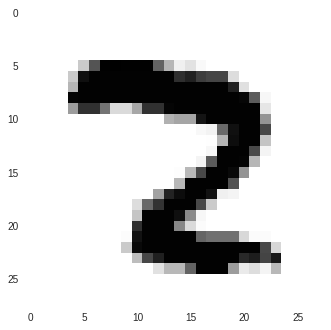

In [0]:
# This show the ith misclassified digit. 
i = 4
wrong_index = wrong_indices[i]

print(predicted_labels[wrong_index])
print(train_labels_original[wrong_index])
plt.imshow(train_images_original[wrong_index])
plt.grid(None)
plt.show()

## Problem 2  Final Solution  --Use logistic regression with binary cross entropy loss.

In [94]:
#Train
train_images_b, train_labels_original, test_images_b, test_labels_original=load_data()
Y=my_own_categorical(train_labels_original)
Wi = {}
for i in range(10):
  print("Digit ", i)
  Wi[i] = train_model_ce(train_images_b, Y[:,i].reshape(-1,1), 0.001, 40, 20)


Digit  0
train model ce
Epoch  19  Loss = 0.05695659164915532
Digit  1
train model ce
Epoch  19  Loss = 0.051457558118640175
Digit  2
train model ce
Epoch  19  Loss = 0.1052729133237544
Digit  3
train model ce
Epoch  19  Loss = 0.11818704352153626
Digit  4
train model ce
Epoch  19  Loss = 0.09125737494532642
Digit  5
train model ce
Epoch  19  Loss = 0.1354736858770796
Digit  6
train model ce
Epoch  19  Loss = 0.06917924117635929
Digit  7
train model ce
Epoch  19  Loss = 0.07542340417183543
Digit  8
train model ce
Epoch  19  Loss = 0.18038318244992244
Digit  9
train model ce
Epoch  19  Loss = 0.002017806186604064


In [95]:
#Evaluation
for i in range (10):
  Y_estimated = (forward_sigmoid(test_images_b, Wi[i])>0.5)
  accuracy = np.sum((Y_estimated == (test_labels_original == i).reshape(-1,1)))/test_labels_original.shape[0]
  print ("Digit ", i, "Accuracy", accuracy)

Digit  0 Accuracy 0.9884
Digit  1 Accuracy 0.9887
Digit  2 Accuracy 0.9696
Digit  3 Accuracy 0.9668
Digit  4 Accuracy 0.9724
Digit  5 Accuracy 0.9568
Digit  6 Accuracy 0.9795
Digit  7 Accuracy 0.9789
Digit  8 Accuracy 0.9406
Digit  9 Accuracy 0.8991


## Problem 3 Explore

- Load the training and test data using Keras, no validation set needed.
- Create network with an input layer consisting of 28 x 28 input neurons and an output layer consisting of 10 output neurons.
- Use softmax and categorical cross entropy loss.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.

In [5]:
# add bias to each instance
m,n=train_images.shape
train_images_b = np.c_[np.ones((m, 1)), train_images]


train_labels_i=np.zeros((m,10))
for i in range(0,9):
  
  train_labels_i_temp=train_labels_original==i
  train_labels_i_temp=train_labels_i_temp.astype('int')
  train_labels_i[:,i]=train_labels_i_temp
  

np.random.seed(42)
initial_weight = np.random.randn(n+1,10) 
print("initial_weight.shape ",initial_weight.shape)
print(initial_weight)

initial_weight.shape  (785, 10)
[[ 0.49671415 -0.1382643   0.64768854 ...  0.76743473 -0.46947439
   0.54256004]
 [-0.46341769 -0.46572975  0.24196227 ...  0.31424733 -0.90802408
  -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  ...  0.37569802 -0.60063869
  -0.29169375]
 ...
 [ 0.59899634  0.85334898 -0.49419002 ... -0.22093172  0.19112423
  -1.14970747]
 [-0.19360951  0.7445864   0.64194713 ... -0.07782144 -0.27595145
  -0.36172384]
 [-0.06289387 -0.44787764  0.65814304 ...  0.06970427 -0.65065662
  -0.32664756]]


In [0]:
def softmax(z):
  z_exp=np.exp(z-np.max(z))
  #rint(z_exp.shape)
  #rint(z_exp)
  total=np.sum(z_exp,axis=1)
  #rint(total.shape)
  #rint(total)
  return z_exp/total.reshape(z_exp.shape[0],1)

In [0]:
def softmax2(z):
  z_exp=np.exp(z-np.max(z))
  #rint(z_exp.shape)
  #rint(z_exp)
  total=np.sum(z_exp)
  #rint(total.shape)
  #rint(total)
  return z_exp/total

In [0]:
test=np.random.randn(12,4) 
test.dtype
a=softmax(test)
#print(a)
#print(np.sum(a,axis=1))

In [0]:
o=np.ones((3,3))-np.arange(3)
#print(o)
ii=np.eye(3)
#print(ii)

In [0]:

# number of epochs
epochs = 20
# learning rate
lr = 0.001
weight = initial_weight
batch_size = 40

dz=np.zeros((batch_size,10))
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    y_shuffled = train_labels_i[shuffled_indices]
   
    for i in range(0, m, batch_size):
        xi = train_images_b_shuffled[i:i+batch_size,:]
        yi = y_shuffled[i:i+batch_size,:]
        z=xi.dot(weight)
        a=softmax(z)
        #for j in range(0,batch_size):
          #ytemp=y_shuffled[j,:]
          #print(ytemp.shape)
          #difftemp=(a[j,:].reshape(1,10)-np.eye(10))
          #print(difftemp.shape)
          
          #dz[j,:]=ytemp.reshape(1,10).dot(difftemp)
        dz= (a - yi) 
        gradient = 1/batch_size * xi.T.dot(dz)
        weight = weight - lr * gradient

 

In [80]:
y_predict = softmax2(train_images_b[1].dot(weight))                  
y_predict

array([9.89108169e-01, 2.52230288e-05, 4.32013323e-04, 1.06590485e-03,
       1.44552103e-05, 7.85054960e-03, 5.68801216e-04, 2.87807920e-04,
       5.24612445e-04, 1.22463385e-04])

In [82]:


# Test accuracy
mt=test_labels_original.shape[0]

#m,n=test_images.shape

test_images_b = np.c_[np.ones((mt, 1)), test_images]

predicted_labels_test_raw=softmax2(test_images_b.dot(weight))  
print(predicted_labels_test_raw.shape)
predicted_labels_test=np.argmax(predicted_labels_test_raw,axis=1)
print(predicted_labels_test.shape)
print(test_labels_original.shape)
predicted_labels_test = predicted_labels_test.astype('uint8')
test_labels_original=test_labels_original.astype('uint8')

wrong_indices_test = [i for i in range(mt) if predicted_labels_test[i] != test_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_test=1.0 - len(wrong_indices_test) / mt
print("Test acc= ",acc_test)
             

(10000, 10)
(10000,)
(10000,)
Test acc=  0.8113


## Problem 3 Final Solution --Use softmax and categorical cross entropy loss.

In [110]:
#Train
train_images_b, train_labels_original, test_images_b, test_labels_original=load_data()
Y=my_own_categorical(train_labels_original)


W= train_model_cc(train_images_b, Y, 0.001, 40, 20)

train model cc
Epoch  19  Loss = 0.4406921995019692


In [112]:
#Evaluation
y_est = forward_softmax(test_images_b, W)
Y_est = np.argmax(y_est, axis = 1)
accuracy = np.sum(Y_est == test_labels_original)/test_labels_original.shape[0]

print ("Accuracy ",accuracy)



Accuracy  0.893


##Loading the MNIST digits data set, and implement functions for P4,P5

In [0]:
from keras.utils import to_categorical
from keras import models
from keras import layers

import numpy as np

In [0]:
def load_data_no_b():
  (train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()
  train_images = train_images_original.reshape(train_images_original.shape[0], -1)/255
  #train_images = train_images.astype('float32') / 255

  test_images = test_images_original.reshape(test_images_original.shape[0], -1)/255
  #test_images = test_images.astype('float32') / 255
  
  
  return train_images, train_labels_original, test_images, test_labels_original

def Safe(r,c, i, j, visited,im): 
  return (i >= 0 and i < r and 
            j >= 0 and j < c and 
            not visited[i][j] and im[i][j]) 
def DFS(r,c,i, j, visited,im): 
    rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
    colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 

    visited[i][j] = True
    for k in range(8): 
        if Safe(r,c,i + rowNbr[k], j + colNbr[k], visited,im): 
            DFS(r,c,i + rowNbr[k], j + colNbr[k], visited,im) 

def countCC(r,c,im): 

    visited = [[False for j in range(c)]for i in range(r)] 
    count = 0
    for i in range(r): 
        for j in range(c): 
            if visited[i][j] == False and im[i][j] ==1: 
                DFS(r,c,i, j, visited,im) 
                count += 1

    return count 

## Problem 4 Explore

Reimplement the network from Problem 3 entirely in Keras.






### Preparing the labels

In [0]:

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
train_labels.shape

(60000, 10)

In [0]:
train_labels_original.shape

(60000,)

In [0]:
np.argmax(train_labels[0])

5

In [0]:
train_labels_original[0]

5

### The network architecture

In [0]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### The compilation step

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### The training step

In [0]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2580 - acc: 0.9245 - val_loss: 0.1218 - val_acc: 0.9635
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1056 - acc: 0.9684 - val_loss: 0.0910 - val_acc: 0.9722
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0698 - acc: 0.9794 - val_loss: 0.0758 - val_acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0502 - acc: 0.9844 - val_loss: 0.0720 - val_acc: 0.9785
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0382 - acc: 0.9888 - val_loss: 0.0762 - val_acc: 0.9775
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0288 - acc: 0.9914 - val_loss: 0.0727 - val_acc: 0.9803
Epoch 7/10
60000/60000 [==============================] - 2s 35us/step - loss: 0

### Display the training/test loss/accuracy

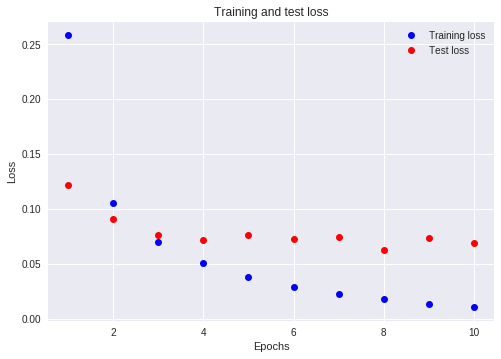

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

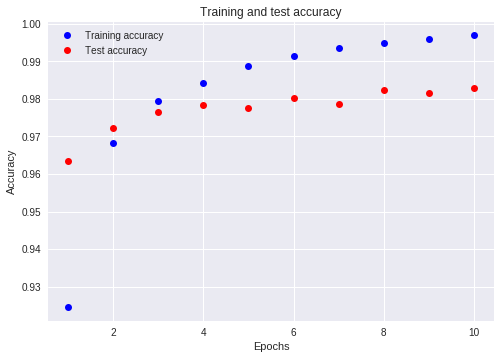

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Problem 4 Final Solution --Reimplement the network from Problem 3 entirely in Keras.

In [120]:
#Train
train_images, train_labels_original, test_images, test_labels_original=load_data_no_b()

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2575 - acc: 0.9245 - val_loss: 0.1501 - val_acc: 0.9551
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1047 - acc: 0.9691 - val_loss: 0.0966 - val_acc: 0.9703
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0693 - acc: 0.9791 - val_loss: 0.0754 - val_acc: 0.9767
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step 

In [121]:
#Eval
history_dict = history.history
print(history_dict['acc'])
print(history_dict['val_acc'])


[0.9245333333333333, 0.9691333333015442, 0.9790833333651224, 0.985, 0.9888, 0.9914833333333334, 0.9928999999682109, 0.9949333333333333, 0.99595, 0.9971833333651224]
[0.9551, 0.9703, 0.9767, 0.9805, 0.9746, 0.9803, 0.9811, 0.9821, 0.9824, 0.9799]


## Problem 5

Extend the network from Problem 4 by adding new features.
- Round the grey values of the images to 1 and 0 so you obtain black and white images. Add as an additional feature the number of white regions. For instance, a typical 0 has 2 white regions and 8 has 3. Use the following neighborhoods for pixels:

```
pixel x,y (indicated by .) is connected to its neighbors (indicated by o):

 o
o.o  
 o
 
ooo
o.o
ooo
```
- Consider the width.
- Consider the height.
- Come up with other features.

You should normalize your new features so that they are at the same scale as the pixel values (between 0 and 1).

In [0]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()
train_images = train_images_original.reshape((60000, 28 * 28))
train_images_b = (train_images.astype('float32') / 255 > 0.5)*1

test_images = test_images_original.reshape((10000, 28 * 28))
test_images_b = (test_images.astype('float32') / 255 > 0.5)*1
  

  
train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)






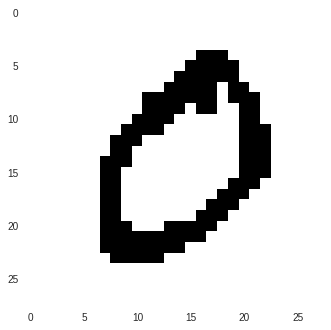

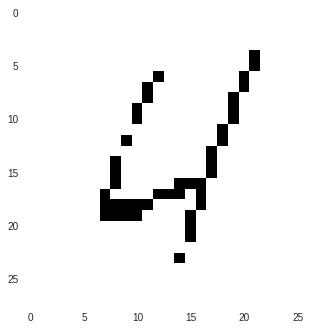

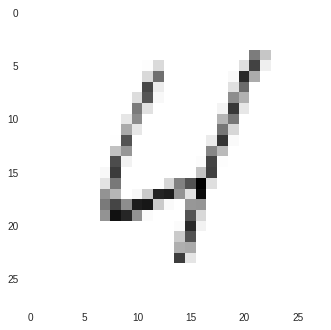

(784,)

In [39]:
#im = filters.threshold_otsu(train_images[0])
#print(train_images[0])
plt.imshow(train_images_b[1].reshape(( 28 ,28)))
plt.grid(None)
plt.show()
plt.imshow(train_images_b[30198].reshape(( 28 ,28)))
plt.grid(None)
plt.show()

plt.imshow(train_images[30198].reshape(( 28 ,28)))
plt.grid(None)
plt.show()
train_images[0].shape

In [40]:
 
def Safe(r,c, i, j, visited,im): 
  return (i >= 0 and i < r and 
            j >= 0 and j < c and 
            not visited[i][j] and im[i][j]) 
def DFS(r,c,i, j, visited,im): 
    rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
    colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 

    visited[i][j] = True
    for k in range(8): 
        if Safe(r,c,i + rowNbr[k], j + colNbr[k], visited,im): 
            DFS(r,c,i + rowNbr[k], j + colNbr[k], visited,im) 

def countCC(r,c,im): 

    visited = [[False for j in range(c)]for i in range(r)] 
    count = 0
    for i in range(r): 
        for j in range(c): 
            if visited[i][j] == False and im[i][j] ==1: 
                DFS(r,c,i, j, visited,im) 
                count += 1

    return count 
im=1-train_images[1].reshape(( 28 ,28))
row = len(im) 
col = len(im[0]) 
  

countCC(row,col,1-train_images_b[1].reshape(( 28 ,28))) 


2

In [0]:
m,n=train_images_b.shape
new_feature_w_region=np.zeros((m,1))
for i in range(0,m):
  new_feature_w_region[i,0]=countCC(row,col,1-train_images_b[i].reshape(( 28 ,28))) 

[[1.]
 [2.]
 [1.]
 ...
 [1.]
 [1.]
 [3.]]
(60000, 1)
[5.]
[[0.2]
 [0.4]
 [0.2]
 ...
 [0.2]
 [0.2]
 [0.6]]
7290


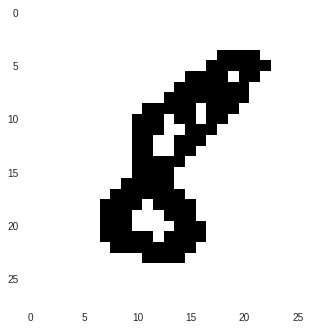

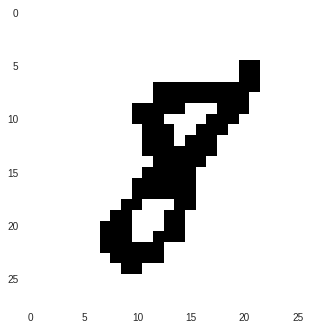

3


In [43]:
new_feature_w_region.shape
print(new_feature_w_region)
print(new_feature_w_region.shape)
print(max(new_feature_w_region))
new_feature_w_region_n=new_feature_w_region/max(new_feature_w_region)
print(new_feature_w_region_n)
ind=np.argmax(new_feature_w_region)
print(ind)
plt.imshow(train_images_b[ind].reshape(( 28 ,28)))
plt.grid(None)
plt.show()

eight=train_labels_original==8
ind_8=np.argmax(eight)
plt.imshow(train_images_b[ind_8].reshape(( 28 ,28)))
plt.grid(None)
plt.show()
cc_8=countCC(row,col,1-train_images_b[ind_8].reshape(( 28 ,28))) 
print(cc_8)

In [0]:
#train_images_ext=np.c_[new_feature_w_region_n,train_images_b]
#train_images_ext.shape

m,n=test_images_b.shape
new_feature_w_region_test=np.zeros((m,1))
for i in range(0,m):
  new_feature_w_region_test[i,0]=countCC(row,col,test_images_b[i].reshape(( 28 ,28))) 
  
new_feature_w_region_n_test=new_feature_w_region_test/max(new_feature_w_region_test)
#test_images_ext=np.c_[new_feature_w_region_n_test,test_images_b]

In [53]:
b_area=np.sum(train_images_b,axis=1)
b_area.shape
print(b_area)
b_area_n=(b_area/max(b_area)).reshape((b_area.shape[0],1))
w_area=28*28-b_area
w_area_n=(w_area/max(w_area)).reshape((w_area.shape[0],1))
print(w_area.shape)
print(b_area.shape)
print(w_area)

train_images_ext=np.c_[b_area_n,w_area_n,new_feature_w_region_n,train_images_b]
train_images_ext.shape

[111 125  81 ...  86  85  82]
(60000,)
(60000,)
[673 659 703 ... 698 699 702]


(60000, 787)

In [54]:
b_area_test=np.sum(test_images_b,axis=1)
b_area_test_n=(b_area_test/max(b_area_test)).reshape((b_area_test.shape[0],1))
w_area_test=28*28-b_area_test_n
w_area_test_n=(w_area_test/max(w_area_test)).reshape((w_area_test.shape[0],1))

test_images_ext=np.c_[b_area_test_n,w_area_test_n,new_feature_w_region_n_test,test_images_b]
test_images_ext.shape

(10000, 787)

In [57]:
num_features=3
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28 +num_features,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 15
history = network.fit(train_images_ext, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images_ext, test_labels))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               403456    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 408,586
Trainable params: 408,586
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 42us/step - loss: 0.2722 - acc: 0.9204 - val_loss: 0.1403 - val_acc: 0.9593
Epoch 2/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.1050 - acc: 0.9687 - val_loss: 0.1039 - val_acc: 0.9688
Epoch 3/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.0651 - acc: 0.9801 - val_loss: 0.0866 - val_acc: 0.9734
Epoch 4/15
60000/60000 [==============================] - 2s 37us/step 

## Problem5 Final

In [0]:
#Train
train_images, train_labels_original, test_images, test_labels_original=load_data_no_b()

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))
